## Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [12]:
user_data = pd.read_csv('user_csvdata.csv')

user_xml = pd.read_xml('user_xmldata.xml')


### Inspecting the user data for any inconsistency

In [5]:
user_data.head()


,First Name,Second Name,Age (Years),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,Oliver,Brady,68,Male,Mitsubishi,WRX,2003,Sedan
1,Denis,Jackson,35,Male,Toyota,Canyon Regular Cab,2011,Convertible
2,Joshua,Williams,26,Male,Honda,1500 Crew Cab,1999,Sedan
3,Malcolm,Johnson,37,Male,Dodge,Legacy,1996,"Sedan, Wagon"
4,Ashley,Bates,57,Male,Chevrolet,A8,2018,Sedan


In [62]:
usr = user_data.copy()

In [72]:
usr.rename(columns = {'First Name': 'firstName', 'Second Name': 'lastName'}, inplace = True)

In [73]:
usr

,firstName,lastName,Age (Years),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,Oliver,Brady,68,Male,Mitsubishi,WRX,2003,Sedan
1,Denis,Jackson,35,Male,Toyota,Canyon Regular Cab,2011,Convertible
2,Joshua,Williams,26,Male,Honda,1500 Crew Cab,1999,Sedan
3,Malcolm,Johnson,37,Male,Dodge,Legacy,1996,"Sedan, Wagon"
4,Ashley,Bates,57,Male,Chevrolet,A8,2018,Sedan
...,...,...,...,...,...,...,...,...
995,Jay,Murray,60,Male,MINI,Outback,1997,Pickup
996,Leslie,Clarke,42,Male,Toyota,Sienna,2014,SUV
997,Natasha,Reid,86,Female,Chevrolet,NX,2015,"Convertible, Coupe"
998,Samantha,Francis,43,Female,Nissan,Silverado 1500 Extended Cab,2010,Sedan


In [74]:
usr.shape

(1000, 8)

In [75]:
usr.isna().sum()

# there are no missing values in any of the columns

firstName        0
lastName         0
Age (Years)      0
Sex              0
Vehicle Make     0
Vehicle Model    0
Vehicle Year     0
Vehicle Type     0
dtype: int64

In [76]:
usr.describe(include='all')


,firstName,lastName,Age (Years),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
count,1000,1000,1000.000000,1000,1000,1000,1000.000000,1000
unique,344,362,NaN,2,54,583,NaN,31
top,Arthur,Smith,NaN,Male,Chevrolet,Silverado 1500 Crew Cab,NaN,SUV
freq,9,27,NaN,517,110,7,NaN,223
mean,NaN,NaN,54.667000,NaN,NaN,NaN,2007.079000,NaN
std,NaN,NaN,20.986056,NaN,NaN,NaN,8.364851,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,1992.000000,NaN
25%,NaN,NaN,37.000000,NaN,NaN,NaN,2000.000000,NaN
50%,NaN,NaN,55.000000,NaN,NaN,NaN,2008.000000,NaN
75%,NaN,NaN,71.250000,NaN,NaN,NaN,2015.000000,NaN


(array([ 93.,  93.,  76.,  99.,  67.,  93., 108., 111., 151., 109.]),
 array([1992. , 1994.8, 1997.6, 2000.4, 2003.2, 2006. , 2008.8, 2011.6,
        2014.4, 2017.2, 2020. ]),
 <BarContainer object of 10 artists>)

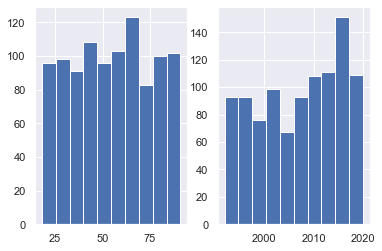

In [77]:
# plotting the freq dist to ascertain if any outliers exists in the 
# numerical columns of the data

plt.subplot(1,2,1)
plt.hist(usr['Age (Years)']), 

plt.subplot(1,2,2)
plt.hist(usr['Vehicle Year'])

# there are also no outliers in the data

In [78]:
user_data_cleaned = usr.copy()

### Exploring the json data

In [41]:
# importing the data
user_json = pd.read_json('user_jsondata.json')
user_json.head()

,firstName,lastName,age,iban,credit_card_number,credit_card_security_code,credit_card_start_date,credit_card_end_date,address_main,address_city,address_postcode,debt
0,Janet,Whittaker,79,GB06TIPX06791401324359,213175641545275,596,12/17,08/20,Studio 6 Robin court,Christopherland,N49 2LB,NaN
1,Kieran,Heath,83,GB28VQOG22478273510511,4153200250709345,248,11/13,08/21,13 Hale light,East Mandy,BA1 4GB,NaN
2,Jane,Turner,29,GB07EALL99866589295356,6011192438703554,610,03/18,04/18,0 Cooper plains,Sharonville,N56 0PY,"{'amount': '4440.19', 'time_period_years': 0}"
3,Arthur,Mistry,27,GB35LSGC87398305883119,502098808533,948,12/18,06/27,312 Parsons junctions,Williamstown,BN5M 3UU,NaN
4,Julian,King,20,GB94ENYC03030578781434,213160758811140,851,06/21,01/25,396 Leon tunnel,South Bethborough,N9J 1TD,NaN


In [42]:
debt = pd.json_normalize(user_json['debt'])

In [43]:
user_json = pd.concat([user_json, debt], axis=1)


In [47]:
user_json_normalized = user_json.drop('debt', axis=1)

In [48]:
user_json_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   firstName                  1000 non-null   object 
 1   lastName                   1000 non-null   object 
 2   age                        1000 non-null   int64  
 3   iban                       1000 non-null   object 
 4   credit_card_number         1000 non-null   int64  
 5   credit_card_security_code  1000 non-null   int64  
 6   credit_card_start_date     1000 non-null   object 
 7   credit_card_end_date       1000 non-null   object 
 8   address_main               1000 non-null   object 
 9   address_city               1000 non-null   object 
 10  address_postcode           1000 non-null   object 
 11  amount                     34 non-null     object 
 12  time_period_years          34 non-null     float64
dtypes: float64(1), int64(3), object(9)
memory usage: 

In [49]:
user_json_cleaned = user_json_normalized.copy()

In [ ]:
# the null values in amount and time_period_years column are over 95% of the total entries. 
# by convention, i will simply drop these columns

### Exploring the xml data

In [52]:
user_xml.head()

,firstName,lastName,age,sex,retired,dependants,marital_status,salary,pension,company,commute_distance,address_postcode
0,Hannah,Jones,21,Female,False,2.0,married or civil partner,20603,0,Ward and Sons,6.56,N06 4LG
1,Tracy,Rowley,50,Female,False,1.0,single,39509,0,"Fuller, King and Robinson",11.01,M1 6JD
2,Shane,Thompson,87,Male,True,2.0,single,53134,13409,NaN,0.00,WF84 1EA
3,Michael,Anderson,85,Male,True,2.0,married or civil partner,58524,39479,NaN,0.00,BN1 7TL
4,Clifford,Mason,64,Male,False,1.0,widowed,32510,0,"Wood, Clarke and Wood",9.53,PH60 9ZT


In [79]:
user_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   firstName         1000 non-null   object 
 1   lastName          1000 non-null   object 
 2   age               1000 non-null   int64  
 3   sex               1000 non-null   object 
 4   retired           1000 non-null   bool   
 5   dependants        978 non-null    float64
 6   marital_status    1000 non-null   object 
 7   salary            1000 non-null   int64  
 8   pension           1000 non-null   int64  
 9   company           758 non-null    object 
 10  commute_distance  1000 non-null   float64
 11  address_postcode  1000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 87.0+ KB


In [80]:
user_xml.describe()

,age,dependants,salary,pension,commute_distance
count,1000.000000,978.000000,1000.000000,1000.000000,1000.000000
mean,54.667000,2.168712,57393.480000,5982.051000,10.540670
std,20.986056,0.964658,23560.620002,11360.109547,7.006735
min,18.000000,1.000000,17179.000000,0.000000,0.000000
25%,37.000000,2.000000,37203.750000,0.000000,5.930000
50%,55.000000,2.000000,58038.000000,0.000000,11.910000
75%,71.250000,3.000000,78381.250000,0.000000,16.580000
max,91.000000,5.000000,98909.000000,45168.000000,20.340000


In [89]:
user_xml_cleaned = user_xml.copy()

### The Joins

In [118]:
json_data = pd.merge(user_json_cleaned, user_data_cleaned, on= ['firstName', 'lastName'], how='outer')

In [119]:
json_data.describe()

,age,credit_card_number,credit_card_security_code,time_period_years,Age (Years),Vehicle Year
count,1020.000000,1.020000e+03,1020.000000,35.000000,1020.000000,1020.000000
mean,54.681373,3.911795e+17,974.059804,2.257143,54.681373,2007.083333
std,20.938469,1.269146e+18,1683.347627,1.540490,20.938469,8.349688
min,18.000000,6.041327e+10,0.000000,0.000000,18.000000,1992.000000
25%,37.000000,3.775741e+13,301.750000,1.000000,37.000000,2000.000000
50%,55.000000,3.502678e+15,577.000000,2.000000,55.000000,2008.000000
75%,71.250000,4.585296e+15,821.250000,3.500000,71.250000,2015.000000
max,91.000000,4.997258e+18,9944.000000,5.000000,91.000000,2020.000000


In [120]:
final_merged = pd.merge(json_data, user_xml_cleaned, how='outer', on= ['firstName', 'lastName'])
final_merged

,firstName,lastName,age_x,iban,credit_card_number,credit_card_security_code,credit_card_start_date,credit_card_end_date,address_main,address_city,...,age_y,sex,retired,dependants,marital_status,salary,pension,company,commute_distance,address_postcode_y
0,Janet,Whittaker,79,GB06TIPX06791401324359,213175641545275,596,12/17,08/20,Studio 6 Robin court,Christopherland,...,79,Female,True,3.0,single,44711,22626,NaN,0.00,N49 2LB
1,Kieran,Heath,83,GB28VQOG22478273510511,4153200250709345,248,11/13,08/21,13 Hale light,East Mandy,...,83,Male,True,1.0,single,44730,13803,NaN,0.00,BA1 4GB
2,Jane,Turner,29,GB07EALL99866589295356,6011192438703554,610,03/18,04/18,0 Cooper plains,Sharonville,...,29,Female,False,2.0,married or civil partner,36439,0,"Palmer, Rogers and Nixon",10.38,N56 0PY
3,Arthur,Mistry,27,GB35LSGC87398305883119,502098808533,948,12/18,06/27,312 Parsons junctions,Williamstown,...,27,Male,False,2.0,married or civil partner,66135,0,Jones Ltd,15.72,BN5M 3UU
4,Julian,King,20,GB94ENYC03030578781434,213160758811140,851,06/21,01/25,396 Leon tunnel,South Bethborough,...,20,Male,False,NaN,single,96677,0,Walker PLC,20.05,N9J 1TD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Gerald,Miles,83,GB35ACTH38515557206352,2289470157207377,660,03/21,06/23,Studio 97v Sarah wells,East Louiseland,...,83,Male,True,2.0,single,59484,14970,NaN,0.00,L6 1XQ
1056,Steven,Brown,32,GB33OFVP34933732035949,4280071656907742,785,09/20,06/23,Flat 2 Baxter loaf,North Francis,...,32,Male,False,3.0,single,98812,0,Dennis LLC,20.33,SW18 8WR
1057,Holly,Robinson,74,GB84HMOB87256317597385,30447170264755,457,11/16,09/30,Flat 56Q Pauline station,Godfreyview,...,74,Female,True,2.0,single,35248,26120,NaN,0.00,M2S 9WL
1058,Samantha,Green,52,GB15MWAN23405812817889,6569583959444097,874,09/20,10/29,69 Humphries mews,Thompsonborough,...,52,Female,False,2.0,married or civil partner,88804,0,Jenkins-Cox,19.01,SA5M 7SJ


In [121]:
user_json_cleaned.shape, user_xml_cleaned.shape, user_data_cleaned.shape

((1000, 13), (1000, 12), (1000, 8))

In [122]:
final_merged.columns

Index(['firstName', 'lastName', 'age_x', 'iban', 'credit_card_number',
       'credit_card_security_code', 'credit_card_start_date',
       'credit_card_end_date', 'address_main', 'address_city',
       'address_postcode_x', 'amount', 'time_period_years', 'Age (Years)',
       'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type',
       'age_y', 'sex', 'retired', 'dependants', 'marital_status', 'salary',
       'pension', 'company', 'commute_distance', 'address_postcode_y'],
      dtype='object')

In [117]:
pd.options.display.max_rows = 1000

# comparing the age columns to find discrepancies
age = final_merged[['age_x', 'age_y', 'Age (Years)']]
age.loc[(age['age_x'] != age['Age (Years)'])]

,age_x,age_y,Age (Years)
45,21,21,46
46,21,46,46
47,46,21,21
48,46,46,21
59,48,50,50
60,48,48,50
61,50,50,48
62,50,48,48
76,44,44,36
77,44,36,36
